In [4]:
import math
import matplotlib.pyplot as plt
from matplotlib import cm

class Vec3():
    def __init__(self, x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z

    def add(self, x, y, z):
        return Vec3(self.x + x, self.y + y, self.z + z)

    def __add__(self, other):
        return self.add(other.x, other.y, other.z)

    def __sub__(self, other):
        return self.add(-other.x, -other.y, -other.z)

    def __neg__(self):
        return Vec3(-self.x, -self.y, -self.z)

    def scale(self, const):
        return Vec3(const * self.x, const * self.y, const * self.z)

    def horizontalDistance(self):
        return math.sqrt(self.x * self.x + self.z * self.z)

    def length(self):
        return math.sqrt(self.x * self.x + self.z * self.z + self.y * self.y)

    def multiply(self, x, y, z):
        return Vec3(self.x * x, self.y * y, self.z * z)

    def copy(self):
        return Vec3(self.x, self.y, self.z)

def lookAngle(xRot, yRot):
  f = xRot * math.pi / 180.0
  f1 = -yRot * math.pi / 180.0
  f2 = math.cos(f1)
  f3 = math.sin(f1)
  f4 = math.cos(f)
  f5 = math.sin(f)
  return Vec3((f3 * f4), (-f5), (f2 * f4))


def elytraPointer(ticks, xRot = 0, yRot = -90, deltaMovement = Vec3(), deltaXRot = 0, height = float('inf'), startingPosition = Vec3(), delta2_rot = None):
  """
  Calculate the position of the elytra after a given amount of ticks of flying on elytra
  :param ticks: the number of ticks to fly for
  :param xRot: the rotation of the player in X axis
  :param yRot: the rotation of the player in Y axis
  :param deltaMovement: the movement of the player, when he is opening the elytra (given as a Vector x, y, z)
  :param deltaXRot: applies a change to X rotation on every tick of flight (given in degrees / tick)
  :param height: if given, will end the simulation when player falls below the given height + startingPosition.y
  :param startingPosition: player's position (x, y, z) when he is opening the elytra
  """
  position = startingPosition
  for _ in range(ticks):
    vec3 = deltaMovement
    vec31 = lookAngle(xRot, yRot)
    f = xRot * math.pi / 180.0;
    d0 = 0.08
    d1 = math.cos(f)  # simplifies from math.sqrt(vec31.x * vec31.x + vec31.z * vec31.z);
    d3 = vec3.horizontalDistance()
    d5 = math.cos(f) ** 2   # d4 simplifies to 1
    vec3 = deltaMovement.add(0.0, d0 * (-1.0 + d5 * 0.75), 0.0)   # Gravity
    if d1 != 0:      # check d1 once for all 3 conditions
      if vec3.y < 0.0:
        d6 = vec3.y * -0.1 * d5
        vec3 = vec3.add(vec31.x * d6 / d1, d6, vec31.z * d6 / d1)   # Gliding acceleration

      if f < 0.0:
        d10 = d3 * (-math.sin(f)) * 0.04
        vec3 = vec3.add(-vec31.x * d10 / d1, d10 * 3.2, -vec31.z * d10 / d1)    # Slowdown from going up

      vec3 = vec3.add((vec31.x / d1 * d3 - vec3.x) * 0.1, 0.0, (vec31.z / d1 * d3 - vec3.z) * 0.1)    # Energy Loss

    deltaMovement = vec3.multiply(0.99, 0.98, 0.99) # Air resistance
    position = position.add(deltaMovement.x, deltaMovement.y, deltaMovement.z)
    if height + position.y <= 0:
      return [position.x, position.y]
    if delta2_rot is not None:
      xRot -= max(- abs(- delta2_rot * (position.y + height) / height) + 1, 0) * deltaXRot
    else:
      xRot -= deltaXRot
  return [position.x, position.y]


In [5]:
# Actual Minecraft's game code for elytra
def fallFlyPoints(ticks, xRot = 0, yRot = 0, deltaMovement = Vec3(), deltaXRot = 0, height = float('inf'), startingPosition = Vec3()):
    position = startingPosition
    for _ in range(ticks):
        vec3 = deltaMovement
        vec31 = lookAngle(xRot, yRot)
        f = xRot * math.pi / 180.0;
        d0 = 0.08
        d1 = vec31.horizontalDistance()
        d3 = vec3.horizontalDistance()
        d4 = vec31.length()
        d5 = math.cos(f)
        d5 = d5 * d5 * min(1.0, d4 / 0.4);
        vec3 = deltaMovement.add(0.0, d0 * (-1.0 + d5 * 0.75), 0.0)   # Gravity
        if vec3.y < 0.0 and d1 > 0.0:
            d6 = vec3.y * -0.1 * d5
            vec3 = vec3.add(vec31.x * d6 / d1, d6, vec31.z * d6 / d1)

        if f < 0.0 and d1 > 0.0:
            d10 = d3 * (-math.sin(f)) * 0.04;
            vec3 = vec3.add(-vec31.x * d10 / d1, d10 * 3.2, -vec31.z * d10 / d1)

        if (d1 > 0.0):
            vec3 = vec3.add((vec31.x / d1 * d3 - vec3.x) * 0.1, 0.0, (vec31.z / d1 * d3 - vec3.z) * 0.1)

        deltaMovement = vec3.multiply(0.99, 0.98, 0.99) # Air resistance
        position = position.add(deltaMovement.x, deltaMovement.y, deltaMovement.z)
        if height + position.y < 0:
            break
        xRot -= deltaXRot

    print(f"position: ({round(position.x, 12)} {round(position.y, 12)} {round(position.z, 12)})")
    print(f"delta movement: ({round(deltaMovement.x, 12)} {round(deltaMovement.y, 12)} {round(deltaMovement.z, 6)})")
    print(f"xRot: ({xRot})")

In [6]:
# This works exactly the same but is simplified
def optimalFallFlyPoints(ticks, xRot = 0, yRot = 0, deltaMovement = Vec3(), deltaXRot = 0, height = float('inf'), startingPosition = Vec3()):
    position = startingPosition
    for _ in range(ticks):
        f = xRot * math.pi / 180.0
        h = -yRot * math.pi / 180.0
        V = deltaMovement
        H = Vec3(math.sin(h), 0.0, math.cos(h))
        U = Vec3(0.0, 1.0, 0.0)
        d3 = V.horizontalDistance()
        d5 = math.cos(f) ** 2   # d4 simplifies to 1

        V = deltaMovement.add(0.0, 0.08 * (d5 * 0.75 - 1.0), 0.0)   # Gravity 1 m/s/s + эффект снижающий гравитацию вполодь до до (1/4)m/s/s
        if math.cos(f):      # взгляд имеет горизонт составляющую
            if V.y < 0.0: # decending
                V = V + (U + H).scale(-V.y * 0.1 * d5)   # wing shape lift. inc U.h & dec drop of U.y

            if f < 0.0: # AoA up
                V = V + (U.scale(3.2) - H).scale(d3 * math.sin(-f) * 0.04)    #AoA lift and drag

            Vh = Vec3(V.x, 0.0, V.z)
            V = V + (H.scale(d3) - Vh).scale(0.1)    # Horizontal redirection & speed  lose for fast turns

        # sim step
        deltaMovement = V.multiply(0.99, 0.98, 0.99) # Air resistance
        position = position.add(deltaMovement.x, deltaMovement.y, deltaMovement.z)
        if height + position.y < 0:
            break

        xRot -= deltaXRot
    print(f"position: ({round(position.x, 12)} {round(position.y, 12)} {round(position.z, 12)})")
    print(f"delta movement: ({round(deltaMovement.x, 12)} {round(deltaMovement.y, 12)} {round(deltaMovement.z, 6)})")
    print(f"xRot: ({xRot})")

In [7]:
# Yea, they're exactly the same
fallFlyPoints(ticks = 1000, xRot = 0, yRot = -90, deltaMovement = Vec3(0.0572, -0.11954, 0.0), deltaXRot = 0, startingPosition=Vec3(0.0, 0.0, 0.0), height=100)
optimalFallFlyPoints(ticks = 1000, xRot = 0, yRot = -90, deltaMovement = Vec3(0.0572, -0.11954, 0.0), deltaXRot = 0, startingPosition=Vec3(0.0, 0.0, 0.0), height=100)

position: (867.390512986663 -100.084938598103 0.0)
delta movement: (1.508428503343 -0.149491525424 0.0)
xRot: (0)
position: (867.390512986663 -100.084938598103 0.0)
delta movement: (1.508428503343 -0.149491525424 0.0)
xRot: (0)


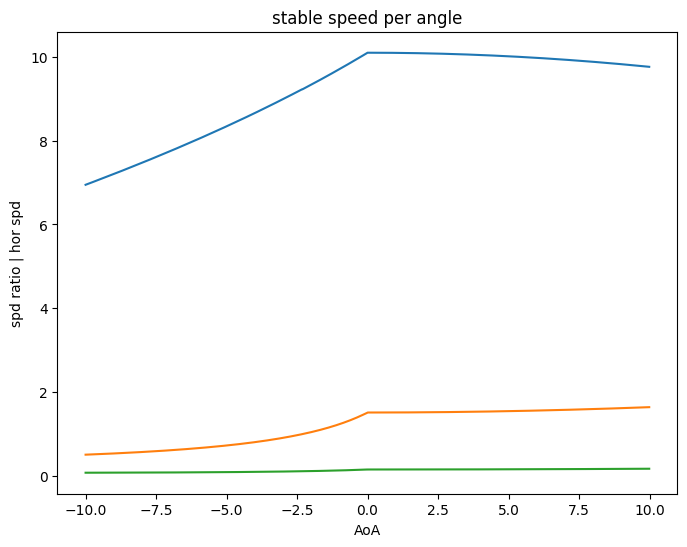

In [8]:
from matplotlib import cm

def speed_eq(angle):
    h = 1
    v = -0.1
    while True:
        dx, dy = elytraPointer(1, angle, deltaMovement= Vec3(h, v, 0))

        if (dx - h)**2 + (dy - v)**2 < 0.00000000001:
            return dx, dy
        h = dx
        v = dy

a_arr = [i * 0.01 for i in range(-1000, +1000)]
rh_arr = []
for angle in a_arr:
    h, v = speed_eq(angle)
    rh_arr.append((h / -v, h,-v))

plt.figure("eq spd", figsize=(8,6))
plt.xlabel("AoA")
plt.ylabel("spd ratio | hor spd")
plt.title("stable speed per angle")
plt.plot(a_arr, rh_arr)

plt.show()


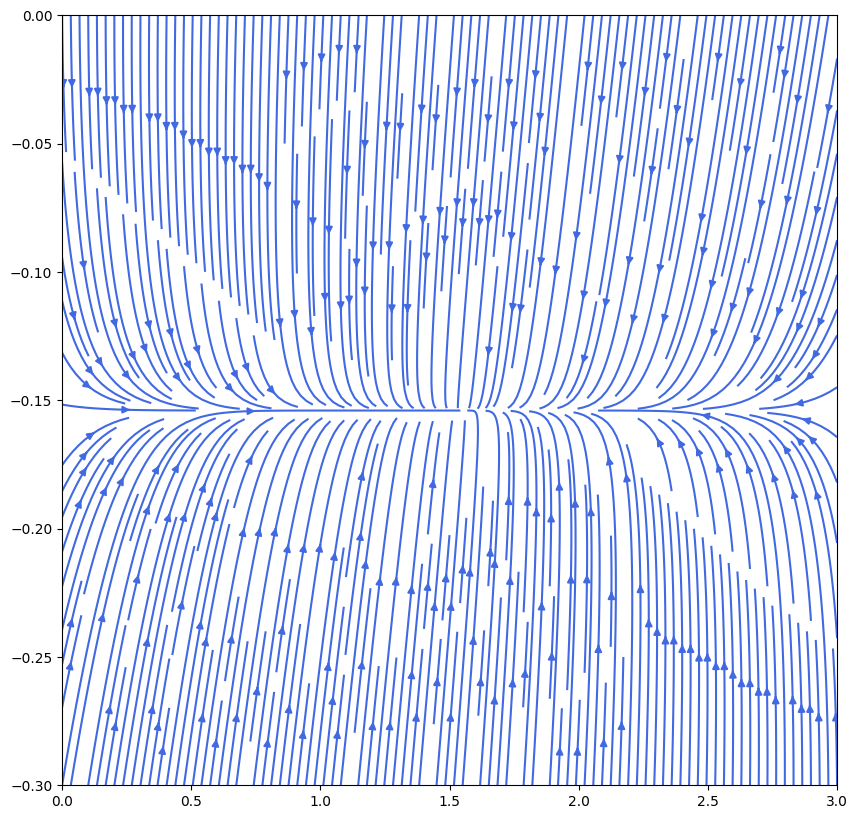

In [9]:
# explore speed stability nodes per AoA

import matplotlib.pyplot as plt
import numpy as np

angle = 5
H = [0.01 * h for h in range(0, 300 +1)]
V = [0.01 * v for v in range(-30, -0 +1)]

Dx, Dy = [], []
for v in V:
    row_dx, row_dy = [], []
    for h in H:
        dx, dy = elytraPointer(1, angle, deltaMovement=Vec3(h, v, 0))
        row_dx.append(dx - h)
        row_dy.append(dy - v)
    Dx.append(row_dx)
    Dy.append(row_dy)

Dx = np.array(Dx)
Dy = np.array(Dy)

plt.figure(figsize=(10, 10))
plt.streamplot(H, V, Dx, Dy, color='royalblue', density=3)
plt.show()


(4.3442491195855935, -3.36)


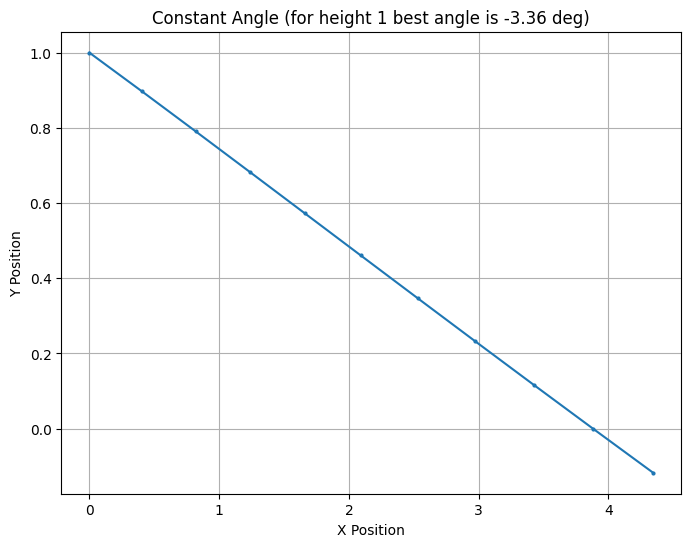

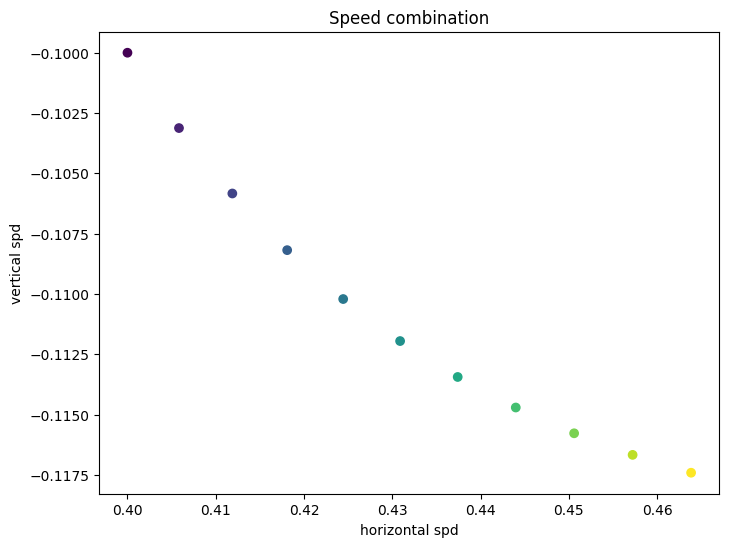

Distance: 4.3442491195855935


In [10]:
from matplotlib import cm

def optimalLine(height, movement):
  """
  The best angle to hold, assuming you don't change it mid flight
  """
  best_distance = 0
  for start_angle in [j * 0.01 for j in range(-700, 700)]:
    x, y = elytraPointer(99999, start_angle, -90, movement, height = height)
    if x > best_distance:
      best_distance = x
      best_angle = start_angle

  return best_distance, best_angle

HEIGHT = 1
MOVEMENT = Vec3(0.4, -0.1, 0)
line_points = optimalLine(HEIGHT, MOVEMENT)
print(line_points)

currentPosition = Vec3(0, HEIGHT, 0)
x_trajectory = [0]
y_trajectory = [HEIGHT]
h_graph = [MOVEMENT.x]
v_graph = [MOVEMENT.y]
deltaMovement = MOVEMENT
rot = line_points[1]
while currentPosition.y > 0:
  next_position = elytraPointer(1, rot, -90, deltaMovement, startingPosition=currentPosition)
  deltaMovement = Vec3(next_position[0] - currentPosition.x, next_position[1] - currentPosition.y, 0)
  currentPosition = currentPosition.add(deltaMovement.x, deltaMovement.y, 0)
  x_trajectory.append(currentPosition.x)
  y_trajectory.append(currentPosition.y)
  h_graph.append(deltaMovement.x)
  v_graph.append(deltaMovement.y)


plt.figure("pos", figsize=(8, 6))
plt.plot(x_trajectory, y_trajectory, marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title(f"Constant Angle (for height {HEIGHT} best angle is {line_points[1]} deg)")
plt.grid()
plt.figure("spd", figsize=(8,6))
plt.xlabel("horizontal spd")
plt.ylabel("vertical spd")
plt.title("Speed combination")
c = [i / (len(v_graph) - 1) for i in range(len(v_graph))]
plt.scatter(h_graph, v_graph, c=c, cmap=cm.viridis)
plt.show()

print(f"Distance: {line_points[0]}")

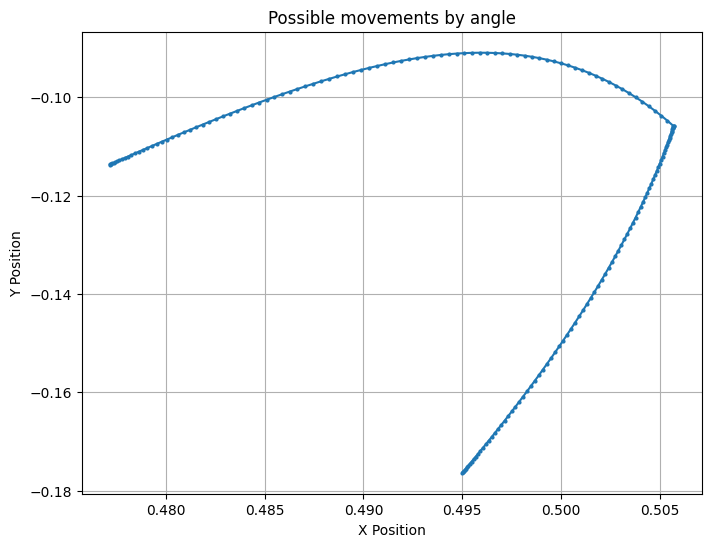

In [11]:
# Graphing different angles while Elytra flying
STARTINGMOVEMENT = Vec3(0.5,-0.1,0)

x_vals = []
y_vals = []
for rot in range(-90, 90, 1):
  points = elytraPointer(1, rot, -90, STARTINGMOVEMENT)
  x_vals.append(points[0])
  y_vals.append(points[1])

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Possible movements by angle")
plt.grid()
plt.show()

In [12]:
# Optimized Greedy search
import copy
from time import sleep
class Vec2():
  def __init__(self, x = 0, y = 0):
    self.x = x
    self.y = y

  def add(self, x, y):
    return Vec2(self.x + x, self.y + y)

  def horizontalDistance(self):
    return self.x

  def __lt__(self, other:"Vec2"):
    return self.x < other.x and self.y < other.y

  def __le__(self, other:"Vec2"):
    return self.x <= other.x and self.y <= other.y

  def __repr__(self):
    return f"({self.x}, {self.y})"

  def length(self):
    return math.sqrt(self.x * self.x + self.y * self.y)

  def multiply(self, x, y):
    return Vec2(self.x * x, self.y * y)

def lookAngleV2(xRot):
  f = xRot * math.pi / 180.0
  f4 = math.cos(f)
  f5 = math.sin(f)
  return Vec2((f4), (-f5))


class RevTree:
    def __init__(self, val:float, par:"RevTree" = None):
        self.val = val
        self.par:"RevTree" = par

    def get(self)->list[float]:
        lst = [self.val]
        par = self.par
        while par != None:
            lst.append(par.val)
            par = par.par
        return reversed(lst)

    def __repr__(self):
        return str(list(self.get()))

class FS: #FlightPoint
    def __init__(self, pos: Vec2, vel:Vec2, ah: RevTree):
        self.pos: Vec2 = pos
        self.vel: Vec2 = vel
        self.ah: RevTree = ah

    def __repr__(self):
        return f"FS[P:{self.pos} U:{self.vel} H:{self.ah}]"


def elytraPointerDP(pos: Vec2, speed:Vec2, xRot = 0):
  position = pos
  vec3 = speed
  vec31 = lookAngleV2(xRot)
  f = xRot * math.pi / 180.0
  d0 = 0.08
  d1 = math.cos(f)
  d3 = vec3.horizontalDistance()
  d5 = math.cos(f) ** 2
  vec3 = vec3.add(0.0, d0 * (-1.0 + d5 * 0.75))
  if d1 != 0:
    if vec3.y < 0.0:
      d6 = vec3.y * -0.1 * d5
      vec3 = vec3.add(vec31.x * d6 / d1, d6)

    if f < 0.0:
      d10 = d3 * (-math.sin(f)) * 0.04
      vec3 = vec3.add(-vec31.x * d10 / d1, d10 * 3.2)

    vec3 = vec3.add((vec31.x / d1 * d3 - vec3.x) * 0.1, 0.0)

  deltaMovement = vec3.multiply(0.99, 0.98)
  position = position.add(deltaMovement.x, deltaMovement.y)
  return position, deltaMovement


def perfectTrajectory(state, ang_res = 10, ang_change = 5):
  """
  (Don't use for high values)
  Checks every trajectory, but as soon as all of the values: x, y, v are below what they are at some other point, it cuts off the simulation
  works in O(61^(log n)) time approximatelly, or something like that
  """
  ang_step = 1/ang_res
  dp_lim = 100
  iter = 0
  processing_gen = 0
  max_x = 0
  dp:list[FS] = [(FS(*copy.deepcopy(state), RevTree(i * ang_change)), 0) for i in range(3  , -3  -1 , -1)] # [(x, y), (mx, my), rot]
  best_point = [0, None]
  while dp:
    #print(len(dp), end = " ")
    cFS, gen = dp.pop(0)
    if gen > processing_gen:
        print(f"start processing gen {gen}")
        processing_gen = gen
    if len(dp) > dp_lim:
        print(f"dp size {len(dp)}, operations {iter}, gen {gen}")
        dp_lim += 100
    if cFS.pos.x > max_x:
        max_x = cFS.pos.x
        #print(f"distance reached {max_x} with {cFS} @gen {gen}")
    prev_angle = cFS.ah.val
    #add = 0
    #rem = 1
    for i in range(ang_change * ang_res, - ang_change * ang_res -1, -1):
      angle = prev_angle + i * ang_step
      npos, nvel = elytraPointerDP(cFS.pos, cFS.vel, angle)
      nah = RevTree(angle, cFS.ah)
      #print(cFS, nFS)
      #sleep(1)
      #print(nFS)
      iter += 1
      if npos.y < 0:
        #print("Fall")
        if npos.x > best_point[0]:
          best_point = (npos.x, nah)
          print(best_point, gen + 1)
        continue

      saved = False
      i = 0
      while i < len(dp):
        ref, _ = dp[i]
        if npos <= ref.pos and  nvel.x <= ref.vel.x: # there is point not worse then new => forget about new point
          break
        if ref.pos <= npos and ref.vel.x <= nvel.x: # there is point stricly worse then new => replace if with new
          dp[i] = (FS(npos, nvel, nah), gen + 1)
          #add += 1
          #rem += 1
          saved = True
          #print("Inferior")
          break
        i += 1
      else:# new not better nor worse => just append
        #print("New")
        #add += 1
        dp.append((FS(npos, nvel, nah), gen + 1))
      if saved:
        while i < len(dp): # case 2 => delete other inferior FS
            if ref.pos <= npos and ref.vel.x <= nvel.x:
                #rem += 1
                del dp[i]
            i += 1
    #print(f"+{add} -{rem} ~ {len(dp)}")
  return best_point

State = (Vec2(0, 1), Vec2(0.4, -0.1))
ans = perfectTrajectory(State, ang_res=2, ang_change=1)

angles = list(ans[1].get())
print(">>>> Solved", ans[0])
print(angles)

start processing gen 1
start processing gen 2
dp size 104, operations 175, gen 2
start processing gen 3
dp size 202, operations 305, gen 3
dp size 304, operations 460, gen 3
dp size 402, operations 595, gen 3
dp size 504, operations 730, gen 3
dp size 602, operations 855, gen 3
dp size 702, operations 980, gen 3
dp size 802, operations 1105, gen 3
dp size 902, operations 1230, gen 3
start processing gen 4
dp size 1004, operations 1385, gen 4
dp size 1102, operations 1540, gen 4
dp size 1203, operations 1705, gen 4
dp size 1303, operations 1950, gen 4
dp size 1402, operations 2115, gen 4
dp size 1502, operations 2295, gen 4
dp size 1602, operations 2540, gen 4
dp size 1703, operations 2680, gen 4
dp size 1802, operations 2910, gen 4
dp size 1903, operations 3115, gen 4
dp size 2004, operations 3260, gen 4
dp size 2102, operations 3430, gen 4
dp size 2202, operations 3675, gen 4
dp size 2304, operations 3830, gen 4
dp size 2404, operations 3955, gen 4
dp size 2501, operations 4200, gen 4

((0, 1), (0.4, -0.1))
[-1, -1.5, -2.0, -2.5, -3.5, -4.5, -5.0, -5.5, -5.5, -5.0, -4.0]


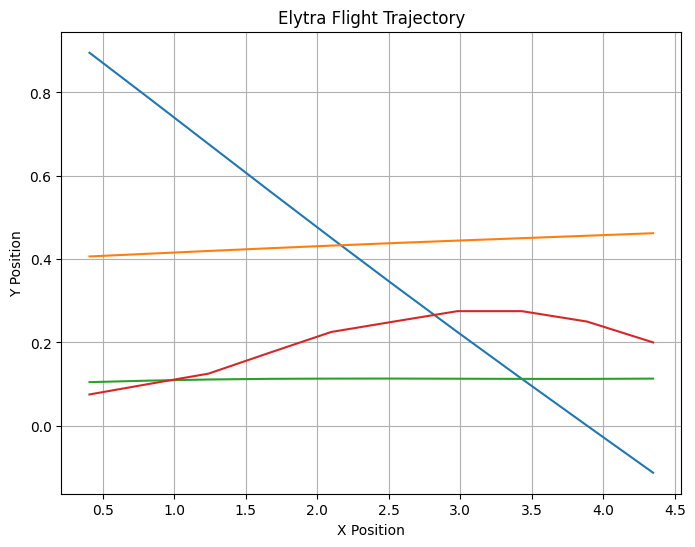

In [18]:
x_trajectory = []
y_trajectory = []
print(State)
print(angles)
pos, vel = State
for angle in angles[1:]:
    pos, vel = elytraPointerDP(pos, vel, xRot = angle)
    x_trajectory.append(pos.x)
    y_trajectory.append((pos.y, vel.x, -vel.y, -angle/20))


plt.figure(figsize=(8, 6))
plt.plot(x_trajectory, y_trajectory, label='Elytra Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Elytra Flight Trajectory')
plt.grid()
plt.show()

In [ ]:
# parabolic approach


def optimalParabol(height, movement):
  """
  Using heuristics, we can assume, that the optimal path is a perfect parabol,
  then the greedy approach can find the best trajectory in just O(n^2) time
  """
  best_distance = 0
  for start_angle in [j * 0.1 for j in range(70, 80)]:
    for delta_rot in [i * 0.001 for i in range(100)]:
      x, y = elytraPointer(99999, start_angle, -90, movement, delta_rot, height)
      if x > best_distance:
        best_distance = x
        best_angle = start_angle
        best_delta = delta_rot

  return best_distance, best_angle, best_delta

HEIGHT = State[0].y
MOVEMENT = (State[1].x, State[1].y, 0)
parabol_points = optimalParabol(HEIGHT, MOVEMENT)
print(f"a: {parabol_points[2]}")
print(f"b: {parabol_points[1]}")

currentPosition = Vec3(0, HEIGHT, 0)
x_trajectory = []
y_trajectory = []
deltaMovement = MOVEMENT
rot = parabol_points[1]
while currentPosition.y > 0:
  next_position = elytraPointer(1, rot, -90, deltaMovement, startingPosition=currentPosition)
  deltaMovement = Vec3(next_position[0] - currentPosition.x, next_position[1] - currentPosition.y, 0)
  currentPosition = currentPosition.add(deltaMovement.x, deltaMovement.y, 0)
  x_trajectory.append(currentPosition.x)
  y_trajectory.append(currentPosition.y)
  rot -= parabol_points[2]

plt.figure(figsize=(8, 6))
plt.plot(x_trajectory, y_trajectory, marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Angle defined by linear function a(t) = 0.039t + 7.6")
plt.grid()
plt.show()

print(f"Distance: {parabol_points[0]}")

TypeError: Vec2.add() takes 3 positional arguments but 4 were given

rot = rot - max(- abs(- 35 * (currentPosition.y) / 50) + 1, 0) * 1.62


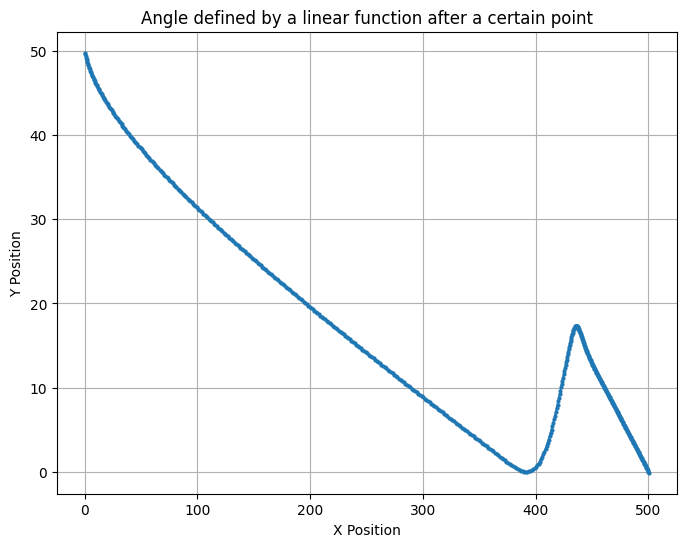

Distance: 500.2586168380082


In [15]:
# parabolic approach
def advancedParabol(height, movement):
  """
  If we assume, that the optimal path is a perfect parabol,
  then the greedy approach can find the best trajectory in just O(n^2) time
  """
  best_distance = 0
  for delta2_rot in [j * 1 for j in range(30, 40)]:
    for start_angle in [j * 0.1 for j in range(-1, 10)]:
      for delta_rot in [(i * 0.02 + 1) for i in range(100)]:
        x, y = elytraPointer(99999, start_angle, -90, movement, delta_rot, height, delta2_rot = delta2_rot)
        if x > best_distance:
          best_distance = x
          best_angle = start_angle
          best_delta = delta_rot
          best_delta2 = delta2_rot

  return best_distance, best_angle, best_delta, best_delta2

HEIGHT = 50
MOVEMENT = Vec3(0.265, -0.2155, 0)
parabol_points = advancedParabol(HEIGHT, MOVEMENT)
print(f"rot = rot - max(- abs(- {parabol_points[3]} * (currentPosition.y) / 50) + 1, 0) * {parabol_points[2]}")

currentPosition = Vec3(0, HEIGHT, 0)
x_trajectory = []
y_trajectory = []
deltaMovement = MOVEMENT
rot = parabol_points[1]
while currentPosition.y > 0:
  #print(currentPosition.x, currentPosition.y, rot)
  next_position = elytraPointer(1, rot, -90, deltaMovement, startingPosition=currentPosition)
  deltaMovement = Vec3(next_position[0] - currentPosition.x, next_position[1] - currentPosition.y, 0)
  currentPosition = currentPosition.add(deltaMovement.x, deltaMovement.y, 0)
  x_trajectory.append(currentPosition.x)
  y_trajectory.append(currentPosition.y)
  rot -= max(- abs(- parabol_points[3] * (currentPosition.y) / HEIGHT) + 1, 0) * parabol_points[2]

plt.figure(figsize=(8, 6))
plt.plot(x_trajectory, y_trajectory, marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Angle defined by a linear function after a certain point")
plt.grid()
plt.show()

print(f"Distance: {parabol_points[0]}")

up angle: -34, down angle: 30, seconds: 179.65


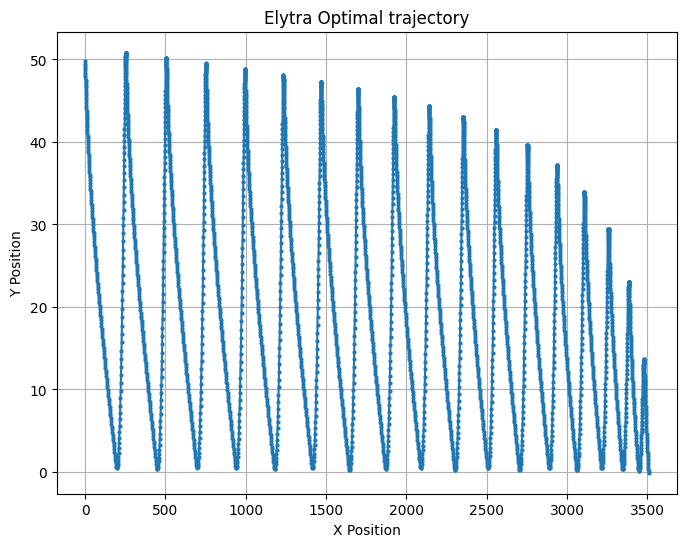

Distance: 3507.7135382518786


In [16]:
# we ball approach
def weBall(height, movement):
  """
  just fly down and when you're low, go back up lol (surprisingly optimal)
  """
  best_distance = 0
  for up_angle in range(-40, -30):
    for down_angle in range(25, 35):
      x_trajectory = []
      y_trajectory = []
      rot = 45
      deltaMovement = movement
      currentPosition = Vec3(0, height, 0)
      i = 0
      while currentPosition.y > 0 and i < 24000:
        next_position = elytraPointer(1, rot, -90, deltaMovement, startingPosition=currentPosition)
        deltaMovement = Vec3(next_position[0] - currentPosition.x, next_position[1] - currentPosition.y, 0)
        currentPosition = currentPosition.add(deltaMovement.x, deltaMovement.y, 0)
        x_trajectory.append(currentPosition.x)
        y_trajectory.append(currentPosition.y)
        i += 1
        if deltaMovement.y < 0:
          rot = down_angle
        if currentPosition.y < 0.9:
          rot = up_angle
      if currentPosition.x > best_distance:
        best_distance = currentPosition.x
        best_x = x_trajectory.copy()
        best_y = y_trajectory.copy()
        best_up_angle = up_angle
        best_down_angle = down_angle
        best_i = i
  return best_distance, best_x, best_y, best_up_angle, best_down_angle, best_i

HEIGHT = 50
MOVEMENT = Vec3(0.265, -0.2155, 0)
weBall_points = weBall(HEIGHT, MOVEMENT)
print(f"up angle: {weBall_points[3]}, down angle: {weBall_points[4]}, seconds: {weBall_points[5] / 20}")

plt.figure(figsize=(8, 6))
plt.plot(weBall_points[1], weBall_points[2], marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Elytra Optimal trajectory")
plt.grid()
plt.show()

print(f"Distance: {weBall_points[0]}")

162.67947461156797 1.8064845180078557
220.58212790762857 53.51287829354313
394.25986041862126 4.206701687780482
451.323157819231 56.47541808849989
626.4459220944957 6.759725529232258
683.6442836445492 59.38478891273239
860.6269277042599 9.325659292386812
917.9903507860861 62.38621415251155
1089.7354990514154 11.712791411985776
1147.6890166827018 65.1656864918033
1312.5889948938736 14.17217882892265
1372.423654389587 67.53205249409055
1372.423654389587 67.53205249409055
down angles: [33, 32, 32, 32, 33, 34]
up angles: [-48, -49, -49, -49, -49, -45]
mouse movement per tick: [0.5, 0.5, 0.5, 0.5, 0.5, 0.4]


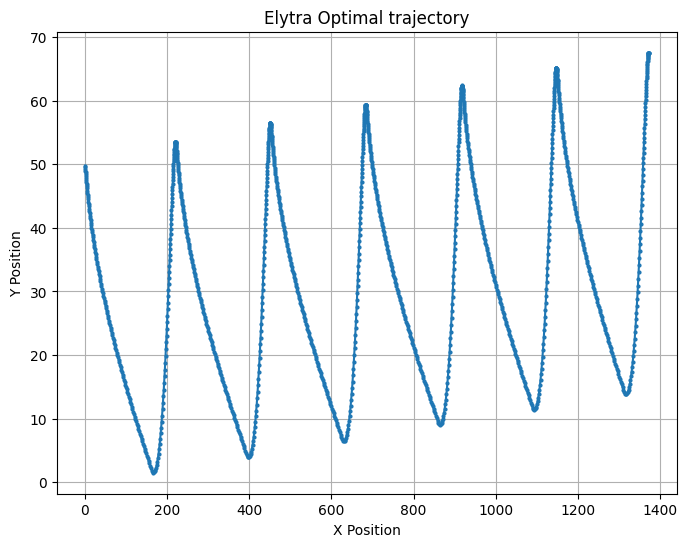

In [17]:
# But what if it's possible to
def flyInfinitely(height, movement=Vec3(0.265, -0.2155, 0), length = 1200, up_delta = 0):
  """
  What do you mean it's impossible? The Moon flies around the Earth infinitely. It's called Orbiting.
  """
  i = 0
  x_trajectory = []
  y_trajectory = []
  down_angles = []
  up_angles = []
  delta_angles = []
  current_position = Vec3(0, height, 0)
  delta_movement = movement
  up = 0
  while current_position.y > 0 and i < length:
    fly_down = bestFlyDown(current_position, delta_movement, up)
    current_position = fly_down['position']
    delta_movement = fly_down['movement']
    x_trajectory.extend(fly_down['x_traj'])
    y_trajectory.extend(fly_down['y_traj'])
    down_angles.append(fly_down['angle'])
    i += len(fly_down['x_traj'])
    print(current_position.x, current_position.y)

    fly_up = bestFlyUp(current_position, delta_movement, up)
    current_position = fly_up['position']
    delta_movement = fly_up['movement']
    x_trajectory.extend(fly_up['x_traj'])
    y_trajectory.extend(fly_up['y_traj'])
    up_angles.append(fly_up['angle'])
    delta_angles.append(fly_up['best_delta_angle'])
    i += len(fly_up['x_traj'])
    print(current_position.x, current_position.y)
    up += up_delta
    if current_position.y < height:
      print(f"height lost")
      return {'position': current_position, 'movement': delta_movement, 'x_traj': x_trajectory, 'y_traj': y_trajectory, 'down_angles': down_angles, 'up_angles': up_angles, 'delta_angles': delta_angles}

  return {'position': current_position, 'movement': delta_movement, 'x_traj': x_trajectory, 'y_traj': y_trajectory, 'down_angles': down_angles, 'up_angles': up_angles, 'delta_angles': delta_angles}

def bestFlyUp(position, movement, up):
  best_y = 0
  for delta_rot in [(i * 0.1) for i in range(11)]:
    for up_angle in range(-60, -40):
      start_angle = up_angle
      delta_movement = movement.copy()
      current_position = position.copy()
      x_trajectory = []
      y_trajectory = []
      while (delta_movement.y > 0 or current_position.y <= 2 + up):
        next_position = elytraPointer(1, up_angle, -90, delta_movement, startingPosition=current_position)
        delta_movement = Vec3(next_position[0] - current_position.x, next_position[1] - current_position.y, 0)
        current_position = current_position.add(delta_movement.x, delta_movement.y, 0)
        x_trajectory.append(current_position.x)
        y_trajectory.append(current_position.y)
        up_angle += delta_rot
      if current_position.y > best_y:
        best_y = current_position.y
        best_movement = delta_movement.copy()
        best_position = current_position.copy()
        best_x_traj = x_trajectory.copy()
        best_y_traj = y_trajectory.copy()
        best_angle = start_angle
        best_delta_angle = delta_rot
  return {'position': best_position, 'movement': best_movement, 'x_traj': best_x_traj, 'y_traj': best_y_traj, 'angle': best_angle, "best_delta_angle": best_delta_angle}

def bestFlyDown(position, movement, up):
  best_speed = 0
  for down_angle in range(25, 40):
    start_angle = down_angle
    x_trajectory = []
    y_trajectory = []
    delta_movement = movement.copy()
    current_position = position.copy()
    while current_position.y > 2 + up:
      next_position = elytraPointer(1, down_angle, -90, delta_movement, startingPosition=current_position)
      delta_movement = Vec3(next_position[0] - current_position.x, next_position[1] - current_position.y, 0)
      current_position = current_position.add(delta_movement.x, delta_movement.y, 0)
      x_trajectory.append(current_position.x)
      y_trajectory.append(current_position.y)
    if delta_movement.x > best_speed:
      best_speed = delta_movement.x
      best_movement = delta_movement.copy()
      best_position = current_position.copy()
      best_angle = start_angle
      best_x_traj = x_trajectory.copy()
      best_y_traj = y_trajectory.copy()
  return {'position': best_position, 'movement': best_movement, 'x_traj': best_x_traj, 'y_traj': best_y_traj, 'angle': best_angle}

HEIGHT = 50
MOVEMENT = Vec3(0.265, -0.2155, 0)
points = flyInfinitely(HEIGHT, MOVEMENT, 1200, 2.5)
print(points['position'].x, points['position'].y)
print(f"down angles: {points['down_angles']}")
print(f"up angles: {points['up_angles']}")
print(f"mouse movement per tick: {points['delta_angles']}")

plt.figure(figsize=(8, 6))
plt.plot(points['x_traj'], points['y_traj'], marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Elytra Optimal trajectory")
plt.grid()
plt.show()